In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('Haberman.csv')
df.info()
df.Class = df.Class.apply(lambda x : x-1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   306 non-null    int64
 1   F1      306 non-null    int64
 2   F2      306 non-null    int64
 3   F3      306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [46]:
# Q1. model for prediction
X_features = df[['F1', 'F2', 'F3']]
Y_features = df['Class']



X = sm.add_constant(X)
Y = Y_features

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 
model_1 = sm.Logit(train_Y, train_X)
model_1 = model_1.fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.514452
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  244
Model:                          Logit   Df Residuals:                      240
Method:                           MLE   Df Model:                            3
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.09929
Time:                        12:16:32   Log-Likelihood:                -125.53
converged:                       True   LL-Null:                       -139.36
Covariance Type:            nonrobust   LLR p-value:                 4.250e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7416      3.075     -0.241      0.809      -6.769       5.286
F1             0.0332      0.015      2.224      0.026       0.004       0.062
F2            -0.0406      0.049     -0.834      0.404      -0.136       0.055
F3             0.1028      0.024      4.251      0.000       0.055       0.150
==============================================================================
"""

In [48]:
# Q.2 make the model using significant features only
significant_features = model_1.pvalues[model_1.pvalues <0.05].index
train_X = train_X[significant_features]
test_X = test_X[significant_features]

model_2 = sm.Logit(train_Y, train_X).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.549399
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  244
Model:                          Logit   Df Residuals:                      242
Method:                           MLE   Df Model:                            1
Date:                Wed, 27 Sep 2023   Pseudo R-squ.:                 0.03810
Time:                        12:16:50   Log-Likelihood:                -134.05
converged:                       True   LL-Null:                       -139.36
Covariance Type:            nonrobust   LLR p-value:                  0.001119
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F1            -0.0255      0.003     -7.445      0.000      -0.032      -0.019
F3             0.0835      0.022      3.812      0.000       0.041       0.126
==============================================================================
"""

In [49]:
#3. Find which features affect the probability positively and negatively
positive_features = model_2.params[model_2.params > 0].index
negative_features = model_2.params[model_2.params < 0].index

print("Features affecting positively are : ", positive_features)
print("Features affecting negatively are : ", negative_features)

Features affecting positively are :  Index(['F3'], dtype='object')
Features affecting negatively are :  Index(['F1'], dtype='object')


In [50]:
#Q4 Youden's index for all possible cut-off probabilites
from sklearn import metrics
cutoff = np.arange(0.1, 0.91, 0.01)
youdens_index = []
cutoff_index = []
for i in cutoff:
    predicted_values = model_2.predict(test_X)
    predicted_values = (predicted_values > i).astype(int)
    confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
    sensitivity = confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])
    specificity = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])
    youden_index = sensitivity + specificity - 1
    youdens_index.append(youden_index)
    cutoff_index.append(i)

print("Youden index : ", youdens_index)
max_youden = -40
optimal_cutoff = -1
for i in range(0, len(youdens_index)):
    if(youdens_index[i] > max_youden) :
        max_youden = youdens_index[i]
        optimal_cutoff = cutoff_index[i]

print("\n\noptimal cutoff value is : ", optimal_cutoff)
print("max youden value at optimal cutoff", max_youden)

Youden index :  [0.0, 0.0, 0.0, 0.0, 0.022727272727272707, 0.03535353535353525, 0.08080808080808088, 0.1262626262626263, 0.06060606060606055, 0.10606060606060597, 0.1742424242424243, 0.19696969696969702, 0.13131313131313127, 0.17676767676767668, 0.18939393939393945, 0.23484848484848486, 0.22474747474747492, 0.23737373737373746, 0.26010101010101017, 0.21717171717171713, 0.20707070707070718, 0.2297979797979799, 0.2297979797979799, 0.2297979797979799, 0.2297979797979799, 0.14141414141414144, 0.16414141414141414, 0.18686868686868685, 0.13131313131313127, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.07575757575757569, 0.02020202020202011, 0.02020202020202011, 0.04292929292929282, 0.04292929292929282, 0.04292929292929282, 0.04292929292929282, 0.04292929292929282, 0.04292929292929282, 0.08838383838383845, 0.08838383838383845, 0.08838383838383845, 0.08838383838383845, 0.

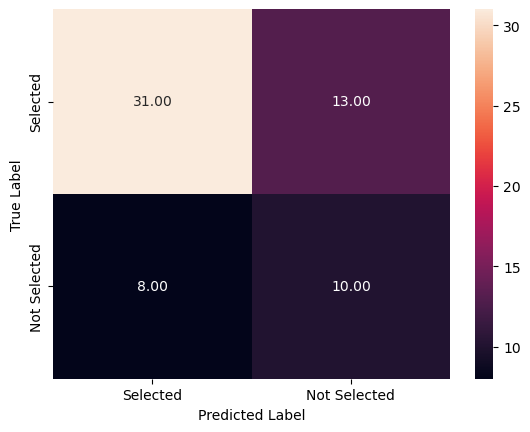



Precision of model is :  0.7948717948717948

Recall of model is :  0.7045454545454546


In [51]:
predicted_values = model_2.predict(test_X)
predicted_values = (predicted_values > optimal_cutoff).astype(int)
confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Selected", "Not Selected"], yticklabels=["Selected", "Not Selected"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

print("\n\nPrecision of model is : ", precision)
print("\nRecall of model is : ", recall)

In [52]:
#Q5 Predicting the cutoff by assuming cost of predicting job as no job 5 times more than no job as job
cost_based_values = []
cost_based_cutoff_indices = []
for i in cutoff:
    predicted_values = model_2.predict(test_X)
    predicted_values = (predicted_values > i).astype(int)
    confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
    cost = 5*confusion_matrix[0][1] + confusion_matrix[1][0]
    cost_based_values.append(cost)
    cost_based_cutoff_indices.append(i)
    
optimal_cutoff_cost = -1
min_cost = 1e9

for i in range(0, len(cost_based_cutoff_indices)):
    if(cost_based_values[i] < min_cost) :
        min_cost = cost_based_values[i]
        optimal_cutoff_cost = cost_based_cutoff_indices[i]

print("\nOptimal cutoff is : ", optimal_cutoff_cost)


Optimal cutoff is :  0.8399999999999996


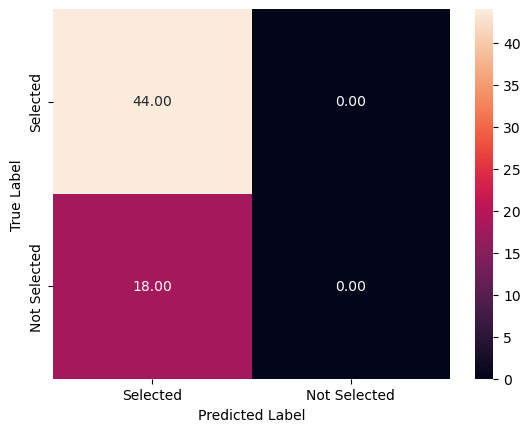



Precision of model is :  0.7096774193548387

Recall of model is :  1.0


In [43]:
#Q6 Finding the precision and recall for cost based method
predicted_values = model_2.predict(test_X)
predicted_values = (predicted_values > optimal_cutoff_cost).astype(int)
confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Selected", "Not Selected"], yticklabels=["Selected", "Not Selected"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

print("\n\nPrecision of model is : ", precision)
print("\nRecall of model is : ", recall)